In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#Some code to beautify the plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## Example 1: PCA on a two dimensional dataset

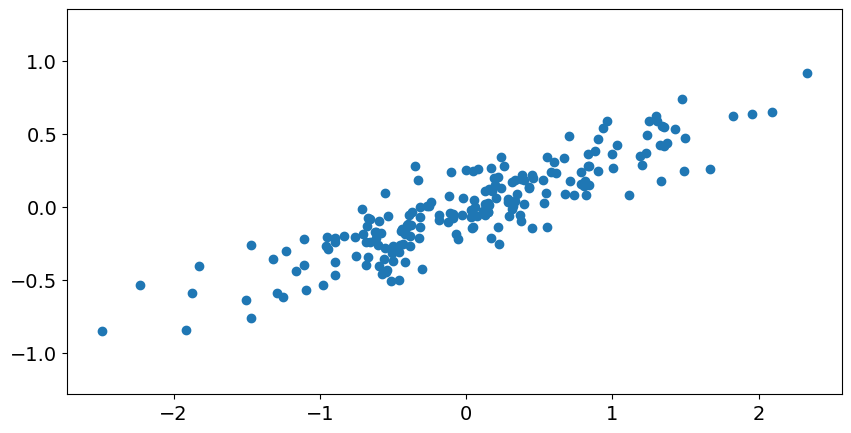

In [2]:
# Create two dimensional dataset
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [4]:
#Simple implementation of PCA 
def mypca(S,nc):
    mu = np.mean(S,1)
    #Remove mean from the samples
    Ss = S - np.tile(mu[:,np.newaxis],(1,S.shape[1]))
    
    #Compute the SVD of the shifted matrix
    u,s,vh = np.linalg.svd(Ss, full_matrices = False)
    
    u = u[:,:nc]   #Principal directions
    s = s[:nc]     #Singular values that can be used to explain variance 
    
    return u, s

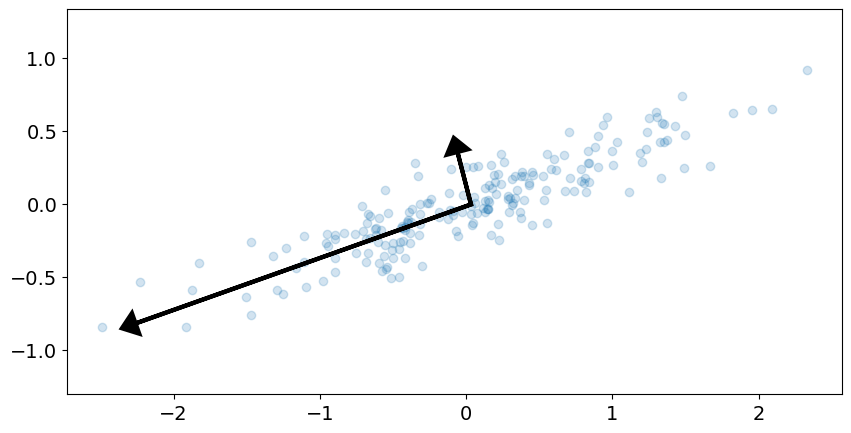

In [5]:
#Compute the PCA of the dataset
u, s = mypca(X.T, nc = 2)

# plot data along with the principal directions
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
mu = np.mean(X,0)
for i in range(s.size):
    v =  0.2*u[:,i]* s[i]
    plt.arrow(mu[0], mu[1], mu[0]+v[0], mu[1]+v[1], \
              linewidth = 3.0, head_width=0.15, head_length=0.1, fc='k', ec='k')
plt.axis('equal');

## 2. Iris data for clustering
Read about this data set at [Scikit Learn](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) and [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [7]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(X.shape)

(150, 4)


Text(0, 0.5, 'Principal component 2')

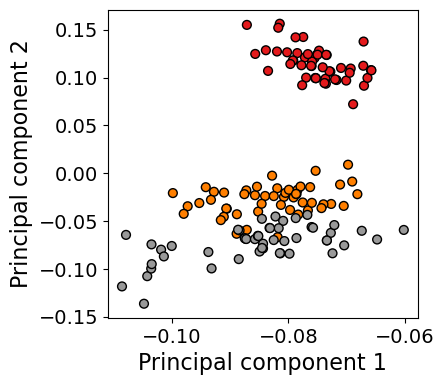

In [8]:
#Reduction from a 4 dimensional to 2 dimensional space for visualization
u,s = mypca(X,2)

# Plot principal components
plt.figure(figsize=(4,4))
plt.scatter(u[:,0],u[:,1], c = y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xlabel('Principal component 1', fontsize = 16)
plt.ylabel('Principal component 2', fontsize = 16)

Text(0.5, 1.0, 'Cumulative Energy')

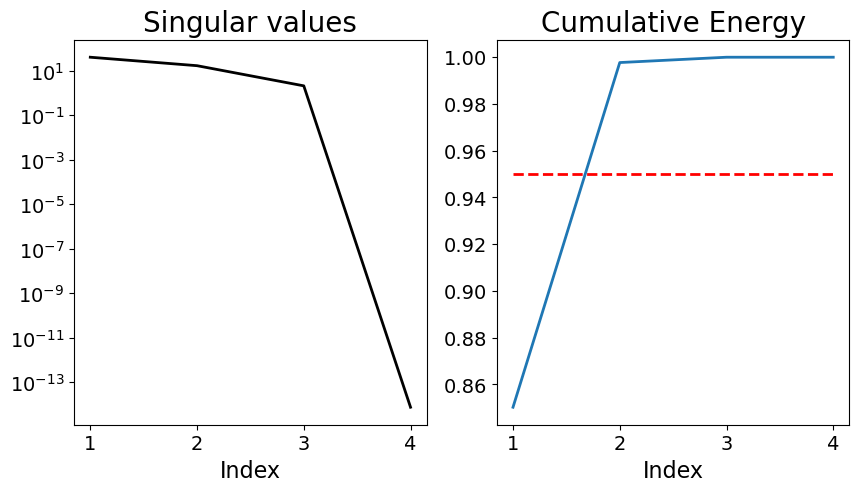

In [9]:
# Plot the singular values  and the explained variance
u,s = mypca(X,4)

ind = range(1,s.size+1)
f,(ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.semilogy(ind,s,'k-', linewidth = 2.0)
ax1.set_xlabel('Index', fontsize = 16)
ax1.set_title('Singular values', fontsize = 20)

ax2.plot(ind,np.cumsum(s**2)/np.sum(s**2), linewidth = 2.0)
ax2.plot(ind,np.ones_like(s)*0.95, 'r--', linewidth = 2.0)
ax2.set_xlabel('Index', fontsize = 16)
ax2.set_title('Cumulative Energy', fontsize = 20)

## Example 3: PCA on images

Data obtained from [link](https://cs.nyu.edu/~roweis/data/olivettifaces.mat).

In [8]:
#Load the images dataset
from scipy.io import loadmat
dataset = loadmat('mat/olivettifaces.mat')

### Plot some sample images from this database

(4096, 400)


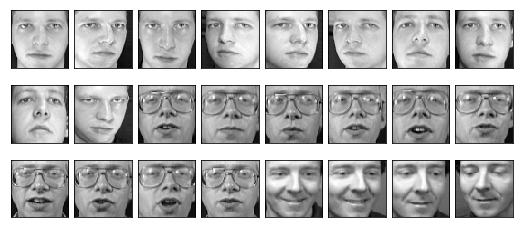

In [9]:
faces = dataset['faces']

print faces.shape

fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(faces[:,i],(64, 64), order = 'F'), cmap = plt.cm.gray)

In [10]:
#Compute the PCA
u,s = mypca(faces,400)

### What do the principal directions look like?

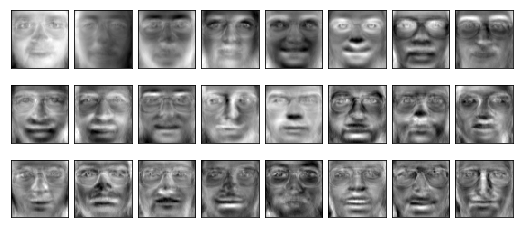

In [11]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(u[:,i],(64, 64), order = 'F'), cmap = plt.cm.gray)

### Plot the singular values of the dataset, and cumulative energy

Text(0.5,1,'Cumulative Energy')

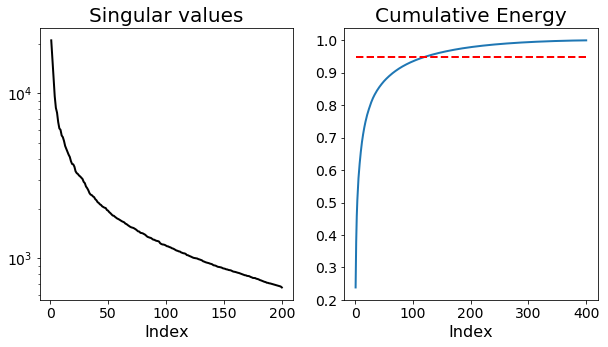

In [12]:
ind = range(1,s.size+1)
f,(ax1,ax2) = plt.subplots(1,2)
ax1.semilogy(ind[:200],s[:200],'k-', linewidth = 2.0)
ax1.set_xlabel('Index', fontsize = 16)
ax1.set_title('Singular values', fontsize = 20)

ax2.plot(ind,np.cumsum(s**2)/np.sum(s**2), linewidth = 2.0)
ax2.plot(ind,np.ones_like(s)*0.95, 'r--', linewidth = 2.0)
ax2.set_xlabel('Index', fontsize = 16)
ax2.set_title('Cumulative Energy', fontsize = 20)

### Determine index which captures 95% of the "energy

In [13]:
ind = np.where(np.cumsum(s**2)/np.sum(s**2) > 0.95)
print "The index which captures 95% of the energy is", np.min(ind)

The index which captures 95% of the energy is 122


## 4. Digits dataset

Data obtained from [link](https://cs.nyu.edu/~roweis/data/mnist_all.mat)

In [17]:
from scipy.io import loadmat

#Extract all the threes from this dataset
threes = loadmat('mat/mnist_all.mat')['train3']
print threes.shape

(6131, 784)


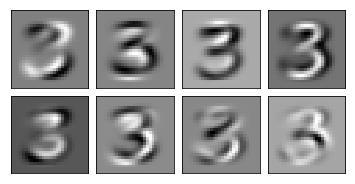

In [15]:
u,s = mypca(threes.T, nc = 8)
fig, axes = plt.subplots(2, 4, figsize=(6, 3),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(u[:,i],(28, 28)), cmap=plt.cm.binary, interpolation='nearest')

### Plot the singular values of the dataset, and cumulative energy

Text(0.5,1,'Cumulative Energy')

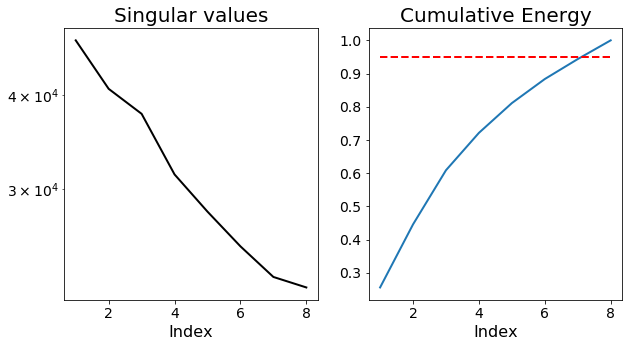

In [16]:
ind = range(1,s.size+1)
f,(ax1,ax2) = plt.subplots(1,2)
ax1.semilogy(ind[:200],s[:200],'k-', linewidth = 2.0)
ax1.set_xlabel('Index', fontsize = 16)
ax1.set_title('Singular values', fontsize = 20)

ax2.plot(ind,np.cumsum(s**2)/np.sum(s**2), linewidth = 2.0)
ax2.plot(ind,np.ones_like(s)*0.95, 'r--', linewidth = 2.0)
ax2.set_xlabel('Index', fontsize = 16)
ax2.set_title('Cumulative Energy', fontsize = 20)

# 5. References
1. Python Data Science Handbook [link](https://jakevdp.github.io/PythonDataScienceHandbook/). 
2. Scikit learn [link](http://scikit-learn.org/stable/)


Explicit code snippets are taken from the following notebooks: [link](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) and [link](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html). 
